In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\\Users\\Administrator\\Documents\\MAA FLIGHTS.csv')

In [3]:
data

,flight_name,ground_speed,true_air_speed,altitude_descend_rate,vertical_acceleration,cross_track_acceleration,body_longitudional_acceleration,flight_path_acceleration,barometer_correct_altitude,glide_slope_deviation,...,aileron_position,elevator_position,rudder_position,engine_fan_speed,wind_speed,wind_direction,squat switch,weight_on_wheeles,flight_phase,report
0,AC2946,140,450,-3500,2.60,0.1,0.3,0.78,5000,-3,...,-5,-10,0,5650,10,0,1,1,landing,1
1,AF3327,140,453,-3000,2.60,0.1,0.3,0.78,5000,-2,...,-3,-7,1,4600,15,10,1,1,landing,1
2,AF3336,141,450,-2500,2.65,0.1,0.2,0.76,5000,-2,...,-4,-8,3,10500,20,50,1,1,landing,0
3,AI976,140,453,-3000,2.60,0.1,0.3,0.78,5000,-3,...,-3,-9,0,4600,13,80,1,1,landing,1
4,AI570,145,453,-3000,2.60,0.1,0.4,0.78,5000,-2,...,-4,-10,2,4600,12,30,1,1,landing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,VS8508,141,450,-2500,2.65,0.1,0.2,0.76,5000,-2,...,-3,-6,1,10500,20,10,1,1,landing,1
59,VS8417,141,450,-2500,2.70,0.2,0.3,0.74,5000,-4,...,-5,-4,2,10500,50,35,1,1,landing,0
60,VS8522,141,450,-2500,2.65,0.1,0.2,0.78,5000,-2,...,-4,-8,3,10500,60,80,1,1,landing,0
61,UK821,140,450,-3500,2.50,0.1,0.3,0.76,5000,-3,...,-5,-10,0,5650,10,0,1,1,landing,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flight_name                      63 non-null     object 
 1   ground_speed                     63 non-null     int64  
 2   true_air_speed                   63 non-null     int64  
 3   altitude_descend_rate            63 non-null     int64  
 4   vertical_acceleration            63 non-null     float64
 5   cross_track_acceleration         63 non-null     float64
 6   body_longitudional_acceleration  63 non-null     float64
 7   flight_path_acceleration         63 non-null     float64
 8   barometer_correct_altitude       63 non-null     int64  
 9   glide_slope_deviation            63 non-null     int64  
 10  localizer_deviation              63 non-null     float64
 11  control_column_position          63 non-null     object 
 12  control_wheel_position  

In [5]:
print(data.isnull().sum())

flight_name                        0
ground_speed                       0
true_air_speed                     0
altitude_descend_rate              0
vertical_acceleration              0
cross_track_acceleration           0
body_longitudional_acceleration    0
flight_path_acceleration           0
barometer_correct_altitude         0
glide_slope_deviation              0
localizer_deviation                0
control_column_position            0
control_wheel_position             0
flap                               0
pitch_angle                        0
roll_angle                         0
track_angle_true                   0
aileron_position                   0
elevator_position                  0
rudder_position                    0
engine_fan_speed                   0
wind_speed                         0
wind_direction                     0
squat switch                       0
weight_on_wheeles                  0
flight_phase                       0
report                             0
d

In [6]:
count = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).\
sort_values(ascending=False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(60)

,Count,%
flight_name,0,0.0
pitch_angle,0,0.0
flight_phase,0,0.0
weight_on_wheeles,0,0.0
squat switch,0,0.0
wind_direction,0,0.0
wind_speed,0,0.0
engine_fan_speed,0,0.0
rudder_position,0,0.0
elevator_position,0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

encoders = {}


for col in data.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    
    data[col] = encoders[col].fit_transform(data[col])

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer    


imputed_data = data.copy(deep = True) 
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(data)

In [9]:
imputed_data

,flight_name,ground_speed,true_air_speed,altitude_descend_rate,vertical_acceleration,cross_track_acceleration,body_longitudional_acceleration,flight_path_acceleration,barometer_correct_altitude,glide_slope_deviation,...,aileron_position,elevator_position,rudder_position,engine_fan_speed,wind_speed,wind_direction,squat switch,weight_on_wheeles,flight_phase,report
0,16,140,450,-3500,2.60,0.1,0.3,0.78,5000,-3,...,-5,-10,0,5650,10,0,1,1,0,1
1,17,140,453,-3000,2.60,0.1,0.3,0.78,5000,-2,...,-3,-7,1,4600,15,10,1,1,0,1
2,18,141,450,-2500,2.65,0.1,0.2,0.76,5000,-2,...,-4,-8,3,10500,20,50,1,1,0,0
3,24,140,453,-3000,2.60,0.1,0.3,0.78,5000,-3,...,-3,-9,0,4600,13,80,1,1,0,1
4,21,145,453,-3000,2.60,0.1,0.4,0.78,5000,-2,...,-4,-10,2,4600,12,30,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,141,450,-2500,2.65,0.1,0.2,0.76,5000,-2,...,-3,-6,1,10500,20,10,1,1,0,1
59,58,141,450,-2500,2.70,0.2,0.3,0.74,5000,-4,...,-5,-4,2,10500,50,35,1,1,0,0
60,60,141,450,-2500,2.65,0.1,0.2,0.78,5000,-2,...,-4,-8,3,10500,60,80,1,1,0,0
61,55,140,450,-3500,2.50,0.1,0.3,0.76,5000,-3,...,-5,-10,0,5650,10,0,1,1,0,1


In [10]:
imputed_data.isna().sum(axis=0)

flight_name                        0
ground_speed                       0
true_air_speed                     0
altitude_descend_rate              0
vertical_acceleration              0
cross_track_acceleration           0
body_longitudional_acceleration    0
flight_path_acceleration           0
barometer_correct_altitude         0
glide_slope_deviation              0
localizer_deviation                0
control_column_position            0
control_wheel_position             0
flap                               0
pitch_angle                        0
roll_angle                         0
track_angle_true                   0
aileron_position                   0
elevator_position                  0
rudder_position                    0
engine_fan_speed                   0
wind_speed                         0
wind_direction                     0
squat switch                       0
weight_on_wheeles                  0
flight_phase                       0
report                             0
d

In [11]:
correlation_mat = imputed_data.corr().abs()

In [12]:
correlation_mat

,flight_name,ground_speed,true_air_speed,altitude_descend_rate,vertical_acceleration,cross_track_acceleration,body_longitudional_acceleration,flight_path_acceleration,barometer_correct_altitude,glide_slope_deviation,...,aileron_position,elevator_position,rudder_position,engine_fan_speed,wind_speed,wind_direction,squat switch,weight_on_wheeles,flight_phase,report
flight_name,1.000000,0.091756,0.095471,0.115385,0.089144,0.156861,0.105079,0.247386,0.205336,0.144509,...,0.154679,0.005327,0.344266,0.113756,0.194957,0.366865,NaN,NaN,NaN,0.053699
ground_speed,0.091756,1.000000,0.827800,0.525779,0.346779,0.546143,0.549039,0.202479,0.122087,0.045963,...,0.384872,0.004961,0.139600,0.212242,0.097512,0.059359,NaN,NaN,NaN,0.180106
true_air_speed,0.095471,0.827800,1.000000,0.567339,0.312009,0.174838,0.298551,0.035239,0.321823,0.032695,...,0.206477,0.146481,0.071529,0.201111,0.051271,0.112536,NaN,NaN,NaN,0.095995
altitude_descend_rate,0.115385,0.525779,0.567339,1.000000,0.002902,0.345035,0.493430,0.408094,0.038909,0.201323,...,0.390803,0.248142,0.262424,0.441587,0.008735,0.284318,NaN,NaN,NaN,0.103510
vertical_acceleration,0.089144,0.346779,0.312009,0.002902,1.000000,0.006924,0.084487,0.285646,0.598604,0.068649,...,0.059396,0.344293,0.088598,0.208820,0.027792,0.448278,NaN,NaN,NaN,0.214310
cross_track_acceleration,0.156861,0.546143,0.174838,0.345035,0.006924,1.000000,0.816423,0.471818,0.652608,0.182564,...,0.215011,0.544852,0.284083,0.263327,0.226415,0.188517,NaN,NaN,NaN,0.100733
body_longitudional_acceleration,0.105079,0.549039,0.298551,0.493430,0.084487,0.816423,1.000000,0.368624,0.553602,0.245327,...,0.241775,0.383884,0.161587,0.380350,0.086905,0.182701,NaN,NaN,NaN,0.043468
flight_path_acceleration,0.247386,0.202479,0.035239,0.408094,0.285646,0.471818,0.368624,1.000000,0.247575,0.204507,...,0.103993,0.139130,0.252152,0.488395,0.140536,0.141749,NaN,NaN,NaN,0.089604
barometer_correct_altitude,0.205336,0.122087,0.321823,0.038909,0.598604,0.652608,0.553602,0.247575,1.000000,0.153558,...,0.015085,0.660988,0.147128,0.421090,0.170844,0.374553,NaN,NaN,NaN,0.098450
glide_slope_deviation,0.144509,0.045963,0.032695,0.201323,0.068649,0.182564,0.245327,0.204507,0.153558,1.000000,...,0.279820,0.207558,0.416855,0.211822,0.033369,0.007971,NaN,NaN,NaN,0.121560


<Axes: >

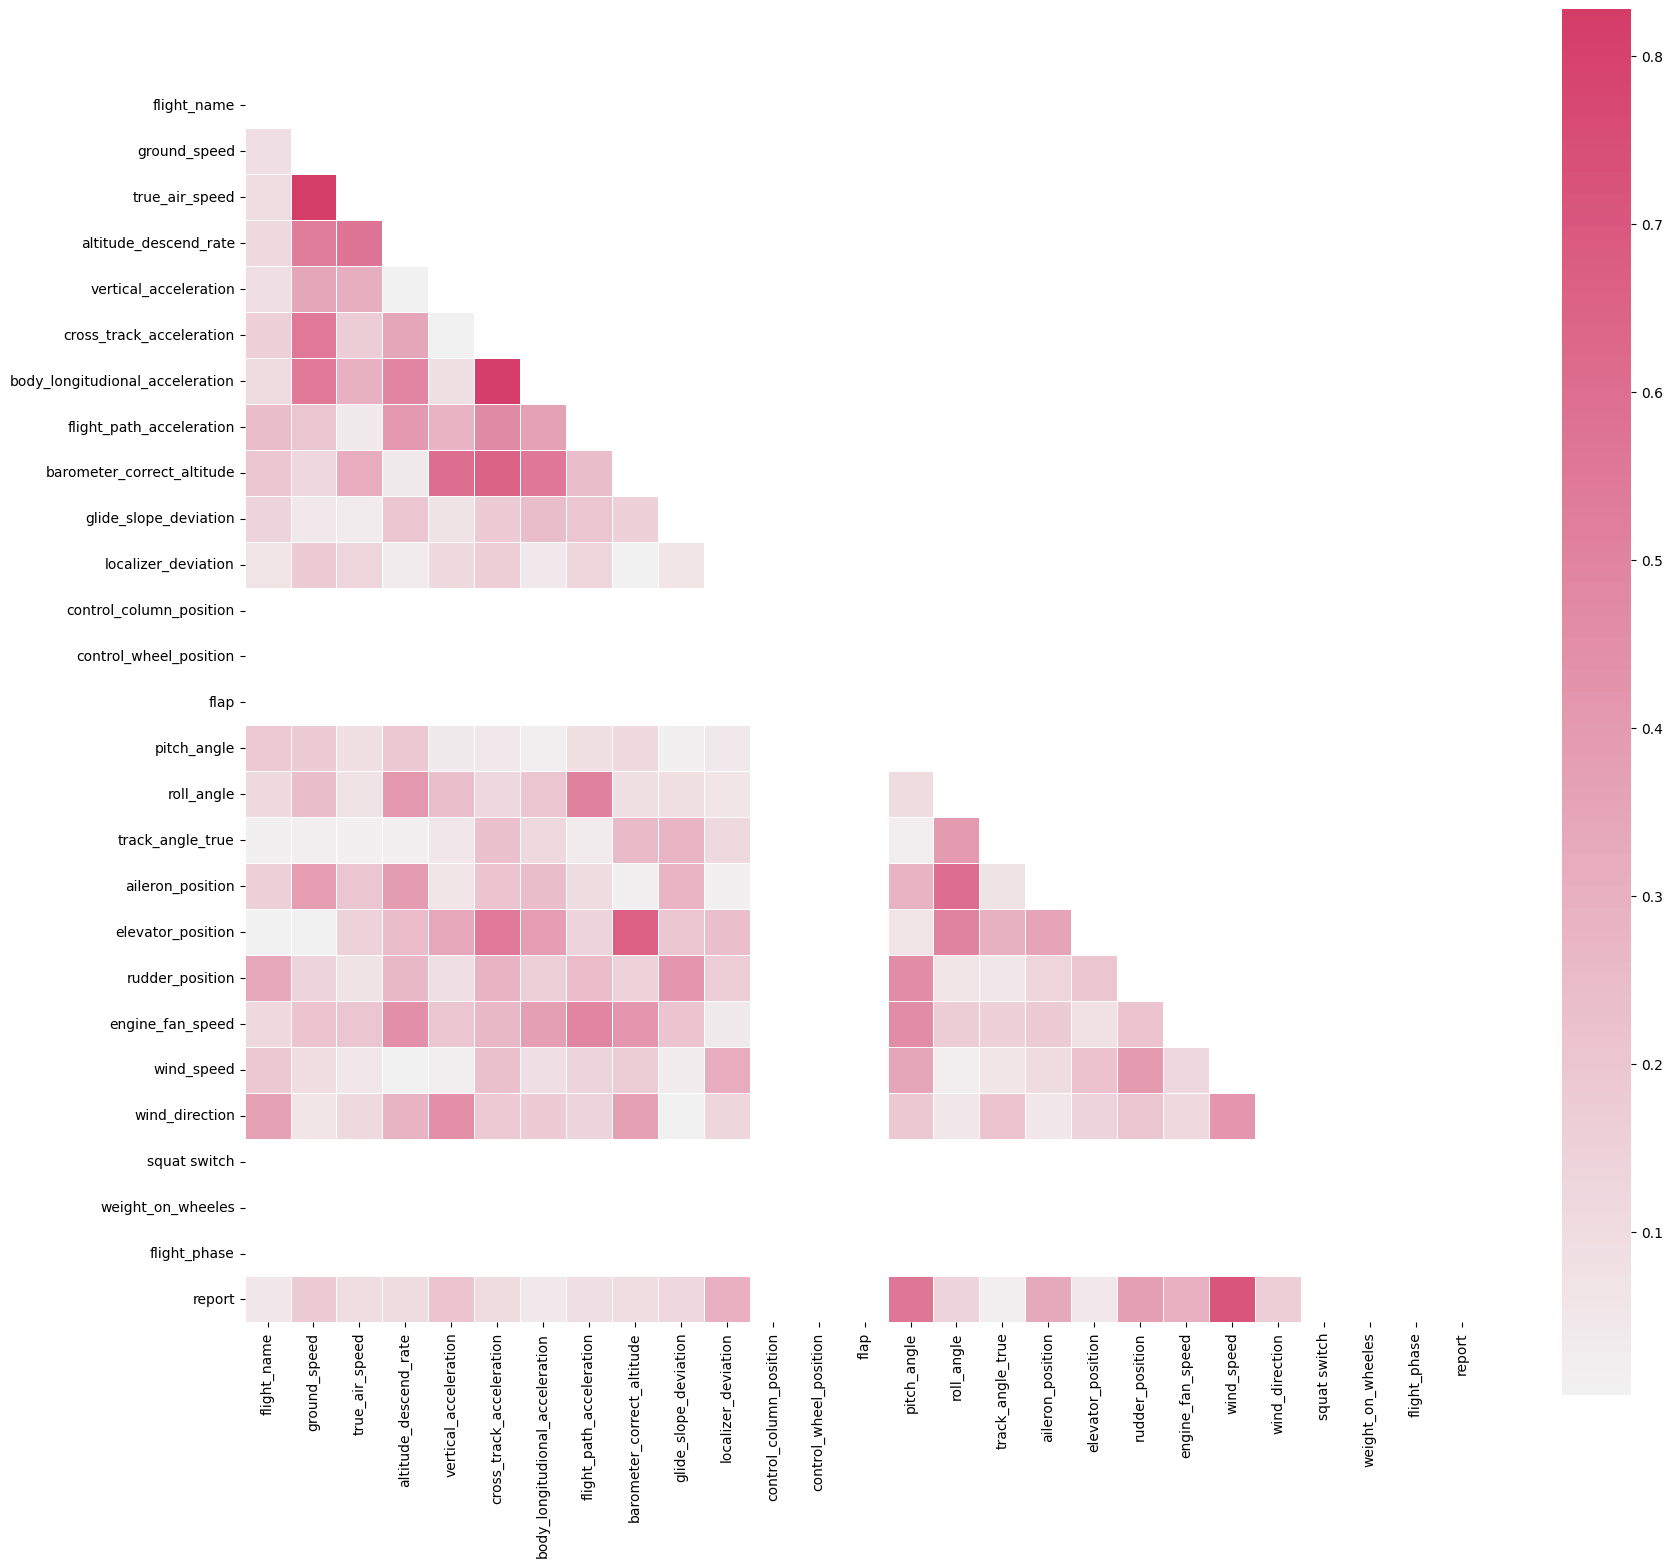

In [13]:
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink":0.9})

In [14]:
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

print(to_drop)

[]


In [15]:
imputed_data.head()

,flight_name,ground_speed,true_air_speed,altitude_descend_rate,vertical_acceleration,cross_track_acceleration,body_longitudional_acceleration,flight_path_acceleration,barometer_correct_altitude,glide_slope_deviation,...,aileron_position,elevator_position,rudder_position,engine_fan_speed,wind_speed,wind_direction,squat switch,weight_on_wheeles,flight_phase,report
0,16,140,450,-3500,2.60,0.1,0.3,0.78,5000,-3,...,-5,-10,0,5650,10,0,1,1,0,1
1,17,140,453,-3000,2.60,0.1,0.3,0.78,5000,-2,...,-3,-7,1,4600,15,10,1,1,0,1
2,18,141,450,-2500,2.65,0.1,0.2,0.76,5000,-2,...,-4,-8,3,10500,20,50,1,1,0,0
3,24,140,453,-3000,2.60,0.1,0.3,0.78,5000,-3,...,-3,-9,0,4600,13,80,1,1,0,1
4,21,145,453,-3000,2.60,0.1,0.4,0.78,5000,-2,...,-4,-10,2,4600,12,30,1,1,0,1


In [16]:
imputed_data.shape

(63, 27)

In [17]:
from collections import Counter
counter_ = Counter(imputed_data['report'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(imputed_data['report']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_,percentage_))

Class=1, n=42 (66.667%)
Class=0, n=21 (33.333%)


In [18]:
from imblearn.combine import SMOTEENN

In [19]:
X, y = imputed_data.drop(['report'], axis = 1), imputed_data.report 

In [20]:
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X,y)

In [21]:
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num,percentage))

Class=0, n=25 (53.191%)
Class=1, n=22 (46.809%)


In [22]:
imputed_data.shape

(63, 27)

In [23]:
correlation_mat = imputed_data.corr().abs()

In [24]:
correlation_mat

,flight_name,ground_speed,true_air_speed,altitude_descend_rate,vertical_acceleration,cross_track_acceleration,body_longitudional_acceleration,flight_path_acceleration,barometer_correct_altitude,glide_slope_deviation,...,aileron_position,elevator_position,rudder_position,engine_fan_speed,wind_speed,wind_direction,squat switch,weight_on_wheeles,flight_phase,report
flight_name,1.000000,0.091756,0.095471,0.115385,0.089144,0.156861,0.105079,0.247386,0.205336,0.144509,...,0.154679,0.005327,0.344266,0.113756,0.194957,0.366865,NaN,NaN,NaN,0.053699
ground_speed,0.091756,1.000000,0.827800,0.525779,0.346779,0.546143,0.549039,0.202479,0.122087,0.045963,...,0.384872,0.004961,0.139600,0.212242,0.097512,0.059359,NaN,NaN,NaN,0.180106
true_air_speed,0.095471,0.827800,1.000000,0.567339,0.312009,0.174838,0.298551,0.035239,0.321823,0.032695,...,0.206477,0.146481,0.071529,0.201111,0.051271,0.112536,NaN,NaN,NaN,0.095995
altitude_descend_rate,0.115385,0.525779,0.567339,1.000000,0.002902,0.345035,0.493430,0.408094,0.038909,0.201323,...,0.390803,0.248142,0.262424,0.441587,0.008735,0.284318,NaN,NaN,NaN,0.103510
vertical_acceleration,0.089144,0.346779,0.312009,0.002902,1.000000,0.006924,0.084487,0.285646,0.598604,0.068649,...,0.059396,0.344293,0.088598,0.208820,0.027792,0.448278,NaN,NaN,NaN,0.214310
cross_track_acceleration,0.156861,0.546143,0.174838,0.345035,0.006924,1.000000,0.816423,0.471818,0.652608,0.182564,...,0.215011,0.544852,0.284083,0.263327,0.226415,0.188517,NaN,NaN,NaN,0.100733
body_longitudional_acceleration,0.105079,0.549039,0.298551,0.493430,0.084487,0.816423,1.000000,0.368624,0.553602,0.245327,...,0.241775,0.383884,0.161587,0.380350,0.086905,0.182701,NaN,NaN,NaN,0.043468
flight_path_acceleration,0.247386,0.202479,0.035239,0.408094,0.285646,0.471818,0.368624,1.000000,0.247575,0.204507,...,0.103993,0.139130,0.252152,0.488395,0.140536,0.141749,NaN,NaN,NaN,0.089604
barometer_correct_altitude,0.205336,0.122087,0.321823,0.038909,0.598604,0.652608,0.553602,0.247575,1.000000,0.153558,...,0.015085,0.660988,0.147128,0.421090,0.170844,0.374553,NaN,NaN,NaN,0.098450
glide_slope_deviation,0.144509,0.045963,0.032695,0.201323,0.068649,0.182564,0.245327,0.204507,0.153558,1.000000,...,0.279820,0.207558,0.416855,0.211822,0.033369,0.007971,NaN,NaN,NaN,0.121560


In [25]:
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

print(to_drop)

[]


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
import tensorflow_probability as tfp

In [28]:
X = imputed_data.drop('report', axis = 1)
y = imputed_data['report']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train_numeric = X_train.to_numpy().reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_numeric = X_test.to_numpy().reshape(X_test.shape[0], 1, X_test.shape[1])

In [31]:
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(60, input_shape=(X_train_numeric.shape[1], X_train_numeric.shape[2])))
lstm_model.add(layers.Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
lstm_model.fit(X_train_numeric, y_train, epochs=5, batch_size=32)

lstm_predictions = lstm_model.predict(X_test_numeric)

lstm_predictions = lstm_predictions.reshape(-1, 1)
y_test = np.array(y_test)

y_test = y_test.reshape(-1, 1)

Epoch 1/5
2/2 [==============================] - 5s 18ms/step - loss: 0.6509 - accuracy: 0.6400
Epoch 2/5
2/2 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.6600
Epoch 3/5
2/2 [==============================] - 0s 16ms/step - loss: 0.6387 - accuracy: 0.6600
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 0.6352 - accuracy: 0.6600
Epoch 5/5
1/1 [==============================] - 1s 726ms/step


In [33]:
def build_bnn_model(input_size):
    model = keras.Sequential([
        layers.Input(shape=(input_size,)),
        tfp.layers.DenseVariational(64, activation='relu', make_posterior_fn=posterior_mean_field, make_prior_fn=prior_trainable),
        tfp.layers.DenseVariational(1, activation='sigmoid', make_posterior_fn=posterior_mean_field, make_prior_fn=prior_trainable),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model



In [34]:
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.0))
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc=t[..., :n], scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1)),
    ])



In [35]:
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

In [36]:
bnn_model = build_bnn_model(lstm_predictions.shape[1])
bnn_model.fit(lstm_predictions.flatten(), y_test, epochs=500, batch_size=32)

bnn_predictions = bnn_model.predict(lstm_predictions)


mse = mean_squared_error(y_test, bnn_predictions)
mae = mean_absolute_error(y_test, bnn_predictions)
mae = mean_absolute_error(y_test, lstm_predictions)

bnn_predictions_binary = (bnn_predictions >= 0.5).astype(int)
accuracy = accuracy_score(y_test, bnn_predictions_binary)

print("MSE of BNN:", mse)
print("MAE of BNN:", mae)
print("MAE of LSTM Predection:", mae)

print("Prediction Accuracy:", accuracy)
print("BNN Predictions:", bnn_predictions)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 3.3279 - accuracy: 0.6923
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 0.9755 - accuracy: 0.6923
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 2.0670 - accuracy: 0.6923
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4554 - accuracy: 0.3077
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 2.9602 - accuracy: 0.3077
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1981 - accuracy: 0.6923
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6318 - accuracy: 0.5385
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 2.0936 - accuracy: 0.3077
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 1.5597 - accuracy: 0.6923
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1931 - accuracy: 0.1538
Epoch 11/500
1/1 [========

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# ... (Your previous code)

# Randomly select a row from the dataset
random_row = np.random.choice(imputed_data.index)
random_data = imputed_data.loc[random_row, :]

# Extract the flight data
user_input = random_data.drop("report").values

# Prepare the input data for the models
input_data = np.array([user_input]).reshape(1, 1, len(user_input))

# Make predictions using the LSTM model
lstm_prediction = lstm_model.predict(input_data)

# Make predictions using the BNN model
bnn_prediction = bnn_model.predict(lstm_prediction)

# Check the final prediction based on the threshold
threshold = 0.5
landing_type = "Hard Landing" if bnn_prediction >= threshold else "Soft Landing"

# Print the result for the random flight data
print("Randomly selected flight data:")
print(random_data)
print(f"Based on the provided flight data, it's predicted to have a {landing_type}.")

# You can use this code to get predictions for different random flight data by running the last part again.


1/1 [==============================] - 0s 31ms/step
Randomly selected flight data:
flight_name                           58.00
ground_speed                         141.00
true_air_speed                       450.00
altitude_descend_rate              -2500.00
vertical_acceleration                  2.70
cross_track_acceleration               0.20
body_longitudional_acceleration        0.30
flight_path_acceleration               0.74
barometer_correct_altitude          5000.00
glide_slope_deviation                 -4.00
localizer_deviation                    0.60
control_column_position                0.00
control_wheel_position                 0.00
flap                                   3.00
pitch_angle                            6.00
roll_angle                             7.00
track_angle_true                     145.00
aileron_position                      -5.00
elevator_position                     -4.00
rudder_position                        2.00
engine_fan_speed                   10

1/1 [==============================] - 0s 24ms/step


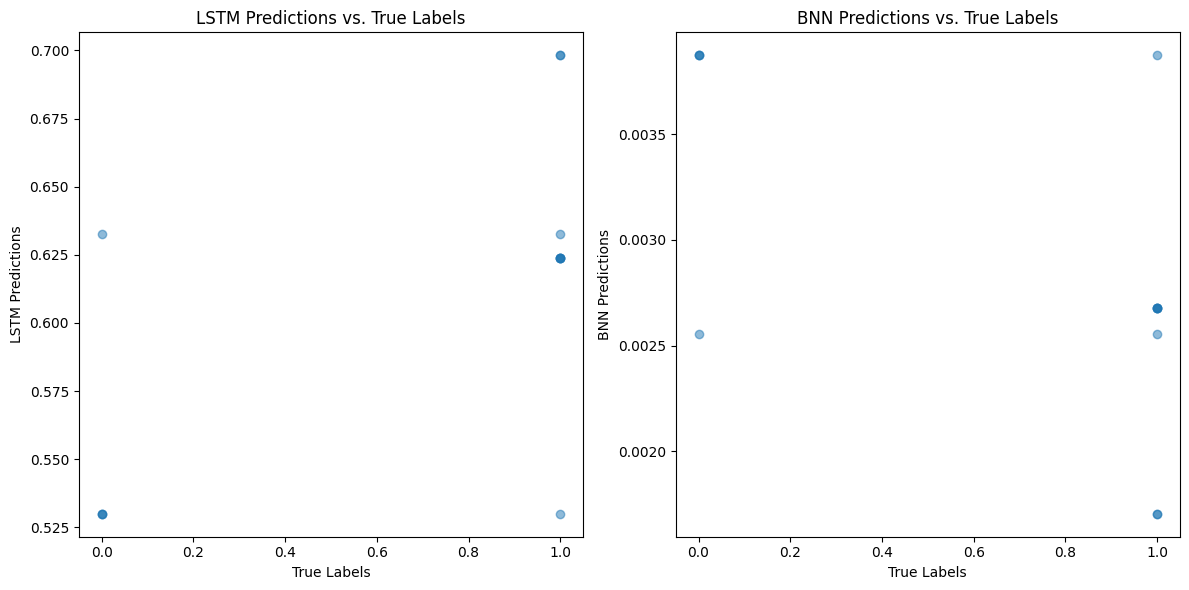

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_probability as tfp

# ... (Your previous code for data loading, preprocessing, and modeling) ...

# Predict using LSTM and BNN
lstm_predictions = lstm_model.predict(X_test_numeric)
bnn_predictions = bnn_model.predict(lstm_predictions)

# Convert BNN predictions to binary
bnn_predictions_binary = (bnn_predictions >= 0.5).astype(int)

# Visualize the LSTM and BNN Predictions
plt.figure(figsize=(12, 6))

# Plot LSTM Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, lstm_predictions, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("LSTM Predictions")
plt.title("LSTM Predictions vs. True Labels")

# Plot BNN Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, bnn_predictions, alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("BNN Predictions")
plt.title("BNN Predictions vs. True Labels")

plt.tight_layout()
plt.show()


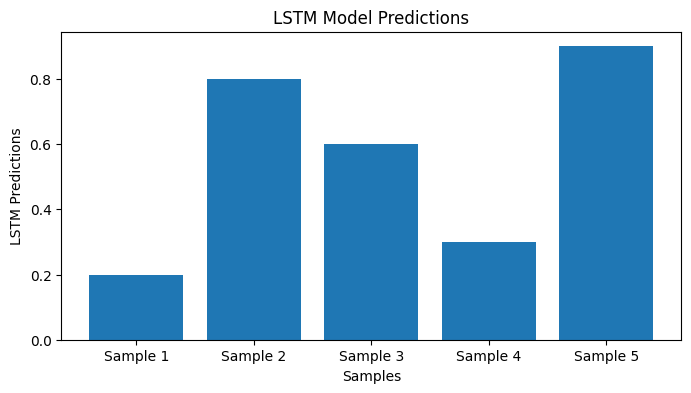

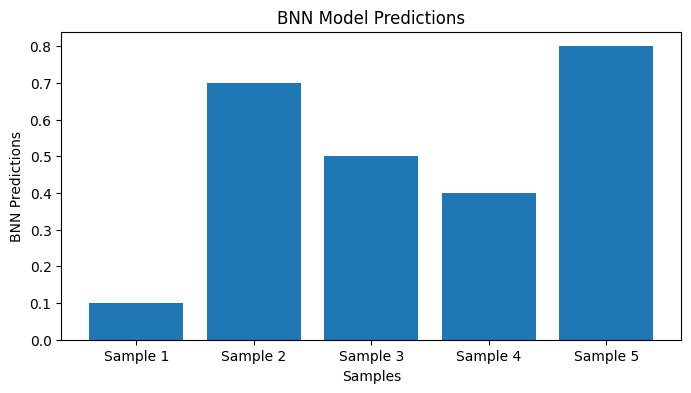

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual predictions from LSTM and BNN
lstm_predictions = np.array([0.2, 0.8, 0.6, 0.3, 0.9])
bnn_predictions = np.array([0.1, 0.7, 0.5, 0.4, 0.8])

# Plot LSTM Predictions
plt.figure(figsize=(8, 4))
plt.bar(range(len(lstm_predictions)), lstm_predictions, tick_label=['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])
plt.xlabel('Samples')
plt.ylabel('LSTM Predictions')
plt.title('LSTM Model Predictions')
plt.show()

# Plot BNN Predictions
plt.figure(figsize=(8, 4))
plt.bar(range(len(bnn_predictions)), bnn_predictions, tick_label=['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])
plt.xlabel('Samples')
plt.ylabel('BNN Predictions')
plt.title('BNN Model Predictions')
plt.show()